##LGBIO1114 - Organes artificiels et réhabilitation

__Auteur :__ Antoine De Comite

__Contenu :__ A l'issue de cette séance vous devriez être capables de : 


*   Comprendre et interpréter les représentations temporelles et fréquentielles d'un signal donné
*   Comprendre le concept de filtre digital
*   Comprendre et expliquer l'impact d'un filtre sur un signal donné



In [ ]:
#@title Librairies utiles 

import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import signal

In [ ]:
#@title Création des signaux
# Please execute this cell to launch the tutorial

def createSignals():
  #This function creates the signal for the second tutorial of LGBIO1114

  np.random.seed(42)
  amplitudes = np.random.uniform(low=0.5,high=4,size=(25,1))
  frequencies = np.random.uniform(low=20,high=5000,size=(25,1))
  phases = np.random.uniform(low=0,high=2*np.pi,size=(25,1))
  time_vector = np.linspace(0,1,10000)
  signal_vector = np.zeros_like(time_vector)
  for ii in range(len(amplitudes)):
    signal_vector = signal_vector + amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*time_vector*time_vector+phases[ii])
  # Ex1

  b1,a1 = sc.signal.butter(6,0.5,'lowpass')
  signal_changed1 = signal_vector - 0.9* sc.signal.filtfilt(b1,a1,signal_vector)

  # Ex2

  b2,a2 = sc.signal.butter(10,(0.25, 0.75),'bandpass')
  signal_changed2 = signal_vector - 0.95 * sc.signal.filtfilt(b2,a2,signal_vector)

  

  # Ex3 - Exercice où il faut un peu plus jouer avec l'ordre du filtre ;) 

  b3,a3 = sc.signal.butter(1,0.5,'lowpass')
  signal_changed3 = signal_vector - 0.9 * sc.signal.filtfilt(b3,a3,signal_vector)
  

  S = np.vstack((time_vector,signal_vector,signal_changed1,signal_changed2,signal_changed3))

  return S


## Partie 0 - Introduction

En appelant la fonction *CreateSignals* vous aurez accès à des signaux représentant un son tel qu'entendu par différents patients (lignes 3 et 4)
que vous pouvez comparer au signal qu'il devrait entendre s'il n'avait pas de problèmes d'auditions (ligne 2). Le première ligne contient le vecteur temps commun à tous ces signaux.

On vous demande, pour chacun des signaux de patient, d'identifier le soucis dont il souffre et de mettre en place une stratégie de traitement de signal lui permettant de récupérer une audition parfaite.


##Partie 1 - Identifier le problème

Dans cette première partie, il vous est demandé d'identifier le soucis dont le patient souffre. Pour ce faire, vous avez accès au signal qu'il devrait entendre et celui qu'il entend. Comparer les signaux dans les domaines temporel et fréquentiel. Qu'observez-vous?



*   Trouvez une méthode pour comparer ces deux signaux (hint: vous pouvez utiliser des opérations arithmétiques basiques). 
*   Une fois la méthode de comparaison trouvée, identifiez la ou les gammes de fréquences posant problème.



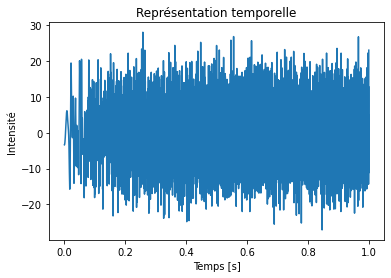

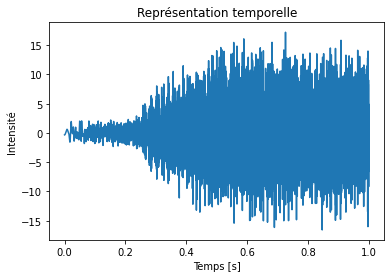

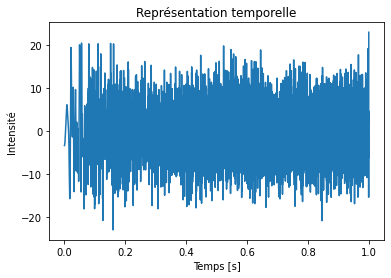

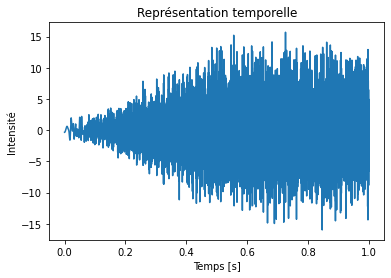

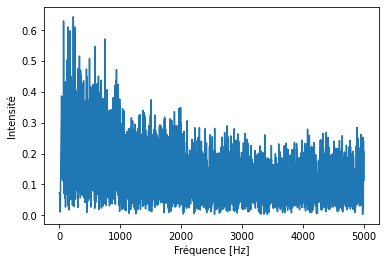

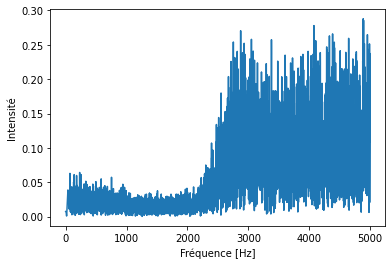

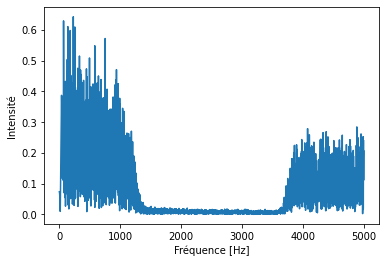

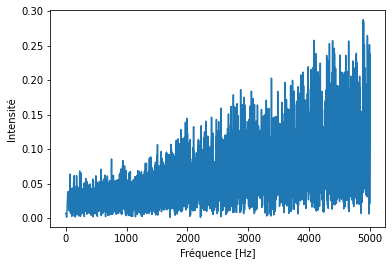

In [ ]:
######################
### Votre code ici ###
######################

def computeTF(t_vector, input_signal):
  fs = 1/(t_vector[1]-t_vector[0])
  tf_sig = np.fft.fft(input_signal)
  freqs = np.fft.fftfreq(len(input_signal),d=1/fs)
  f_vector = freqs
  return tf_sig, f_vector

def RepresFreq(f_vecteur,tf_sig):
  plt.plot(f_vecteur,tf_sig)
  plt.xlabel("Fréquence [Hz]")
  plt.ylabel("Intensité")
  plt.show()

def RepresTemporelle(t_vector,input_signal):
  plt.plot(t_vector,input_signal)
  plt.title("Représentation temporelle")
  plt.xlabel("Temps [s]")
  plt.ylabel("Intensité")
  plt.show()


S = createSignals()
temps = S[0,:]
n = len(temps)
signal_sain = S[1,:]
signal_pat1 = S[2,:]
signal_pat2 = S[3,:]
signal_pat3 = S[4,:]


#Computing the Fourier transforms

tf_signal_sain,f_vector = computeTF(temps,signal_sain)
freqs = f_vector[:n//2]
tf_signal_sain = 2*abs(tf_signal_sain[:n//2])/n

tf_signal_pat1,f_vector = computeTF(temps,signal_pat1)
freqs = f_vector[:n//2]
tf_signal_pat1 = 2*abs(tf_signal_pat1[:n//2])/n

tf_signal_pat2,f_vector = computeTF(temps,signal_pat2)
freqs = f_vector[:n//2]
tf_signal_pat2 = 2*abs(tf_signal_pat2[:n//2])/n

tf_signal_pat3,f_vector = computeTF(temps,signal_pat3)
freqs = f_vector[:n//2]
tf_signal_pat3 = 2*abs(tf_signal_pat3[:n//2])/n

# Représentation de tous les signaux


RepresTemporelle(temps,signal_sain)
RepresTemporelle(temps,signal_pat1)
RepresTemporelle(temps,signal_pat2)
RepresTemporelle(temps,signal_pat3)


RepresFreq(freqs,tf_signal_sain)
RepresFreq(freqs,tf_signal_pat1)
RepresFreq(freqs,tf_signal_pat2)
RepresFreq(freqs,tf_signal_pat3)

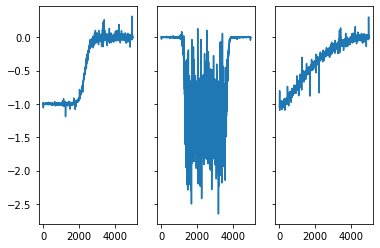

In [ ]:
# Partie représentant les diagrammes de bode pour les différents signaux


bode1 = np.log10(tf_signal_pat1/tf_signal_sain)
bode2 = np.log10(tf_signal_pat2/tf_signal_sain)
bode3 = np.log10(tf_signal_pat3/tf_signal_sain)


fig, ax = plt.subplots(1,3,sharey=True)
ax[0].plot(freqs,bode1)
ax[1].plot(freqs,bode2)
ax[2].plot(freqs,bode3)

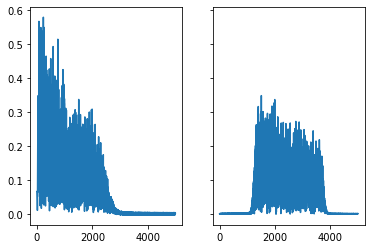

In [ ]:
# que se passe-t'il si on calcule les différences ? 


diff1 = tf_signal_sain - tf_signal_pat1
diff2 = tf_signal_sain - tf_signal_pat2
fig, ax=plt.subplots(1,2,sharey=True)
ax[0].plot(freqs,diff1)
ax[1].plot(freqs,diff2)

On remarque qu'avec les différences, il est très compliqué de déterminer la ou les fréquence(s) de coupure ainsi que les gains à appliquer. Tandis que dans le cas des quotients, c'est beaucoup plus clair.

Il est intéressant d'arriver au diagramme de bode car il ramène les rapports en décibels qui sont l'unité de référence pour l'intensité. 

## Partie 2 - Résoudre le problème

Dans cette seconde partie, il vous est demandé de metter au point une stratégie de traitement de signal permettant de recouvrer une audition normale à partir des signaux entendus par les patients souffrant de surdité légère. Appliquez cela pour chacun des signaux fournis.

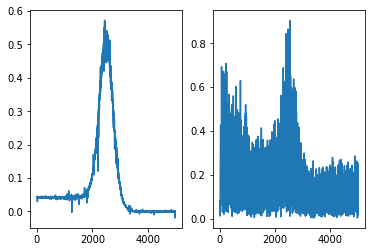

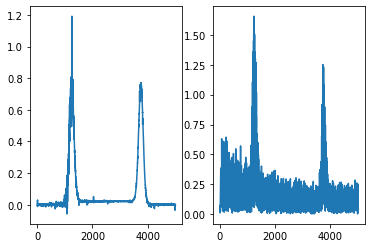

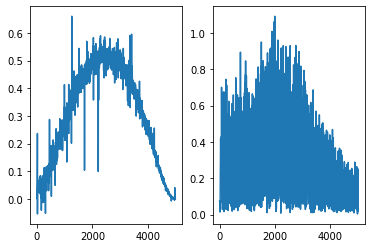

In [ ]:
######################
### Votre code ici ###
######################

# Signal 1-3 - Réparation

# 1. On va récupérer la partie du signal qui pose soucis en lui appliquant un filtre. L'astuce est de sélectionner le bon type de filtre et la bonne fréquence de coupure

b_recup1,a_recup1 = sc.signal.butter(6,0.5,'lowpass')
troncature1 = sc.signal.filtfilt(b_recup1,a_recup1,signal_pat1)

b_recup2,a_recup2 = sc.signal.butter(10,(0.25,0.75),'bandpass')
troncature2 = sc.signal.filtfilt(b_recup2,a_recup2,signal_pat2)
signal_sain2 = signal_pat2 + 20*troncature2

b_recup3,a_recup3 = sc.signal.butter(1,0.5,'lowpass')
troncature3 = sc.signal.filtfilt(b_recup3,a_recup3,signal_pat3)
signal_sain3 = signal_pat3 + 10*troncature3

# Vérifions que ça aille mieux 

tf_signal_sain1,f_vector = computeTF(temps,signal_sain1)
freqs = f_vector[:n//2]
tf_signal_sain1 = 2*abs(tf_signal_sain1[:n//2])/n

bode = np.log10(tf_signal_sain1/tf_signal_sain)


fig, ax = plt.subplots(1,2)
ax[0].plot(freqs,bode)
ax[1].plot(freqs,tf_signal_sain1)

# signal 2

tf_signal_sain2,f_vector = computeTF(temps,signal_sain2)
freqs = f_vector[:n//2]
tf_signal_sain2 = 2*abs(tf_signal_sain2[:n//2])/n

bode = np.log10(tf_signal_sain2/tf_signal_sain)


fig, ax = plt.subplots(1,2)
ax[0].plot(freqs,bode)
ax[1].plot(freqs,tf_signal_sain2)

# signal 3

tf_signal_sain3,f_vector = computeTF(temps,signal_sain3)
freqs = f_vector[:n//2]
tf_signal_sain3 = 2*abs(tf_signal_sain3[:n//2])/n

bode = np.log10(tf_signal_sain3/tf_signal_sain)


fig, ax = plt.subplots(1,2)
ax[0].plot(freqs,bode)
ax[1].plot(freqs,tf_signal_sain3)

Numériquement, il n'y a pas de solution "miracle" pour se dédouanner du pic central... On peut enchaîner avec des passes bande par exemple mais ça ne fera que déplacer le problème... Après c'est un mal pour un bien ici...